In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [11]:
def read_thermo(filename):

    with h5py.File(filename, 'r') as f:

        eigs = f['sig']['re'][...] + 1j*f['sig']['im'][...]
        eigs_0 = f['sig_0th']['re'][...] + 1j*f['sig_0th']['im'][...]
        eigs_2 = f['sig_2nd']['re'][...] + 1j*f['sig_2nd']['im'][...]
        k_z = f['k_z'][...]

        lam_f = f.attrs['lam_f']
        l_f = f.attrs['l_f']

    return np.transpose(eigs)/lam_f, np.transpose(eigs_0)/lam_f, np.transpose(eigs_2)/lam_f, k_z/l_f

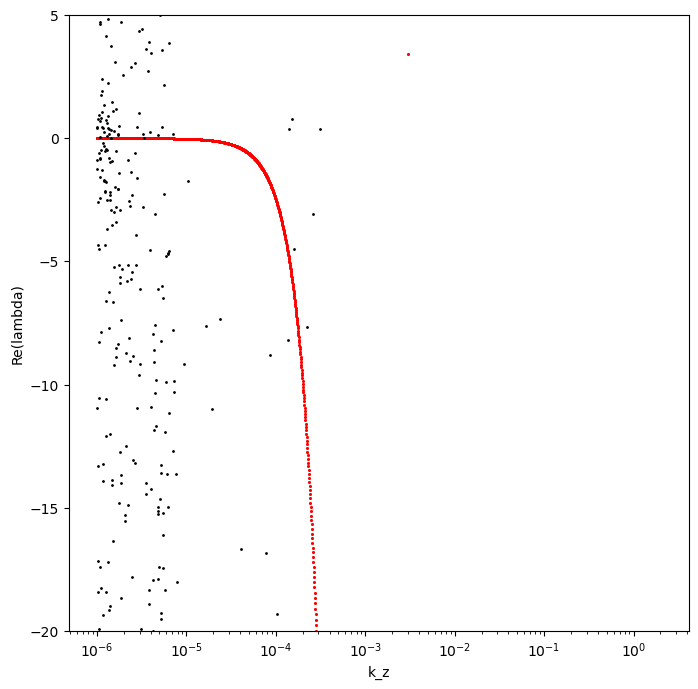

In [12]:
# Read data

eigs, eigs_0, eigs_2, k_z = read_thermo('thermo.h5')

# Plot the results

plt.figure(figsize=[8,8])

d = eigs.shape[0]

for j in range(d):
    i = np.where(np.abs(eigs[j,:].imag) > 1e-12)[0]
    if len(i) > 1:
        plt.scatter(k_z[i], eigs[j,i].real, 1, color='r')
    i = np.where(np.abs(eigs[j,:].imag) < 1e-12)[0]
    if len(i) > 1:
        plt.scatter(k_z[i], eigs[j,i].real, 1, color='k')

plt.xlabel('k_z')
plt.ylabel('Re(lambda)')
plt.ylim(-20, 5)
plt.xscale('log')


Text(0.5, 1.0, 'w_f = 1.00e-12')

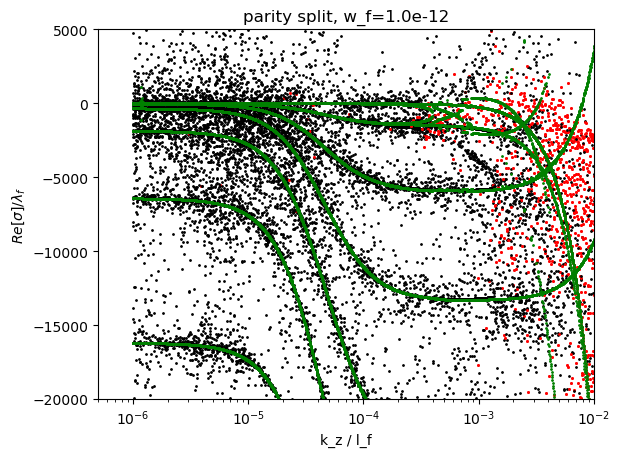

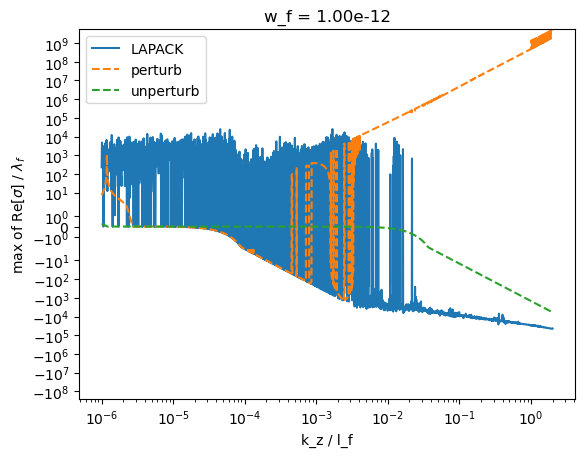

In [14]:
N = 17
sys_size = 4 * (2*N+1)

w_f = 1.E-12

eigs_approx = eigs_0 + w_f**2 * eigs_2

plt.figure()

for i in range(sys_size):
    conj_pairs_mask = np.abs(eigs.imag[i,:]) > 1.E-16
    inv_mask = ~conj_pairs_mask
    plt.scatter(k_z[conj_pairs_mask], eigs.real[i,conj_pairs_mask], s=1, c='r', zorder=0)
    plt.scatter(k_z[inv_mask], eigs.real[i,inv_mask], s=1, c='k', zorder=0)
    plt.scatter(k_z, eigs_approx.real[i,:], s=1, c='g', zorder=1)

plt.xscale('log')
plt.xlim(5E-7, 1E-2)
plt.ylim(-2E4, 5e3)
plt.xlabel('k_z / l_f')
plt.ylabel(r'$Re[\sigma] / \lambda_f$')
plt.title(f'parity split, w_f={w_f:.1e}')

def get_max_reals(arr):
    # if arr is 2D, get's the list of m
    inds = np.argmax(arr.real, axis=0)
    red_array = [arr[inds[i], i] for i in range(inds.size)]
    return np.array(red_array)


max_reals_true   = get_max_reals(eigs)
max_reals_approx = get_max_reals(eigs_approx)
max_reals_0      = get_max_reals(eigs_0)

plt.figure()

plt.plot(k_z, max_reals_true.real, label='LAPACK')
plt.plot(k_z, max_reals_approx.real, '--', label='perturb')
plt.plot(k_z, max_reals_0.real, '--', label='unperturb')
plt.xlabel('k_z / l_f')
plt.xscale('log')
plt.ylabel(r'max of Re[$\sigma$] / $\lambda_f$')
plt.yscale('symlog')
plt.legend()
plt.title(f'w_f = {w_f:.2e}')